In [2]:
# Carrega pacotes/libs
library(tidyverse)
library(lubridate)
library(googlesheets)
library(ggplot2)
library(ggrepel)
library(extrafont)
## Gera mapas
library(sf)
library(ggspatial)
library(maps)  
library(ggsn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registering fonts with R

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Loading required package: grid



In [ ]:
# Importa levantamento de disparos
# dados <- gs_key("DEPRECATED")

# Importa aba de mapeamento de casos de operações com helicóptero como um dataframe
operacoes <- dados %>% gs_read(ws = "EVIDENCIAS_H_OPERACOES") 

Waiting for authentication in browser...

Press Esc/Ctrl + C to abort

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=178989665258-f4scmimctv2o96isfppehg1qesrpvjro.apps.googleusercontent.com&scope=https%3A%2F%2Fspreadsheets.google.com%2Ffeeds%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=ig08KA3HOj



In [3]:
# Filtra casos com evidências de disparo
df <- operacoes %>% filter(DISPARO == 1)

In [5]:
# Carrega shapes
brasil <- st_read("../../GEODADOS/municipio/brasil2.shp")
bairro <- st_read("../../GEODADOS/municipio/bairros_disparo.shp")
rio <- st_read("../../GEODADOS/bairros/Limite_Bairro.shp")
vegetal <- st_read("../../GEODADOS/vegetal/cobvegetal2.shp")


# Troca NA por zero
bairro$EVIDENCI_1 <- as.character(bairro$EVIDENCI_1)
bairro$EVIDENCI_1[bairro$EVIDENCI_1 == "#N/A"] <- "0"
bairro$EVIDENCI_1 <- as.integer(bairro$EVIDENCI_1)
#replace(bairro$EVIDENCI_1, bairro$EVIDENCI_1 == "<NA>", 0)
#is.na(bairro$EVIDENCI_1)

# Seleciona bairros que serão plotados/legendados
bairro <- bairro %>% filter(EVIDENCI_1 > 0)
s_bairros <- bairro %>% filter(EVIDENCI_1 > 6)

# Caixa alta nos nomes
s_bairros$BAIRRO <- toupper(s_bairros$BAIRRO)


Reading layer `brasil2' from data source `/home/abitporu/medialab/INTERVENCAO/GEODADOS/municipio/brasil2.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -53.1101 ymin: -25.31144 xmax: -39.66518 ymax: -14.23311
epsg (SRID):    NA
proj4string:    +proj=longlat +ellps=GRS80 +no_defs
Reading layer `bairros_disparo' from data source `/home/abitporu/medialab/INTERVENCAO/GEODADOS/municipio/bairros_disparo.shp' using driver `ESRI Shapefile'
Simple feature collection with 162 features and 12 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -43.79547 ymin: -23.08291 xmax: -43.0969 ymax: -22.74603
epsg (SRID):    NA
proj4string:    +proj=longlat +ellps=GRS80 +no_defs
Reading layer `Limite_Bairro' from data source `/home/abitporu/medialab/INTERVENCAO/GEODADOS/bairros/Limite_Bairro.shp' using driver `ESRI Shapefile'
Simple feature collection with 162 features and

In [52]:
# Merge dataframe
rk_bairro <- as.data.frame(table(disparos$COD_BAIRRO))
rk_bairro$CODBAIRRO = rk_bairro$Var1
casos_bairro <- merge(bairro,rk_bairro)

# escala
escala = c("0", "2","4","6","8","10")

# sombra para texto
#geom_shadowtext(aes(label=label, color=label), bg.colour='firebrick')
casos_bairro

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

CODBAIRRO,BAIRRO,CODRA,CODRA_TXT,RA,CODRP,CODAP,SHAPESTAre,SHAPESTLen,OBJECTID,EVIDENCIAS,EVIDENCI_1,Var1,Freq,geometry
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<int>,<MULTIPOLYGON [°]>
4,Caju,1,I,Portuária,1.1,1,5347495.0,19800.522,320,Caju,3,4,3,MULTIPOLYGON (((-43.22522 -...
5,Centro,2,II,Centro,1.1,1,5424753.7,22846.245,260,Centro,1,5,1,MULTIPOLYGON (((-43.17833 -...
6,Catumbi,3,III,Rio Comprido,1.1,1,539459.9,5123.712,281,Catumbi,1,6,1,MULTIPOLYGON (((-43.19415 -...
12,Benfica,7,VII,São Cristóvão,1.1,1,1736417.4,9097.990,248,Benfica,1,12,1,MULTIPOLYGON (((-43.23374 -...
14,Santa Teresa,23,XXIII,Santa Teresa,1.1,1,5157142.3,27344.841,278,Santa Teresa,1,14,1,MULTIPOLYGON (((-43.19104 -...
25,Ipanema,6,VI,Lagoa,2.1,2,3084915.3,23487.557,311,Ipanema,1,25,1,MULTIPOLYGON (((-43.19487 -...
33,Tijuca,8,VIII,Tijuca,2.2,2,10065585.3,20628.853,280,Tijuca,2,33,2,MULTIPOLYGON (((-43.21606 -...
39,Manguinhos,10,X,Ramos,3.1,3,2618358.2,8090.409,231,Manguinhos,4,39,4,MULTIPOLYGON (((-43.23928 -...
43,Penha,11,XI,Penha,3.5,3,5811338.8,13667.794,190,Penha,2,43,2,MULTIPOLYGON (((-43.25649 -...


In [43]:
s_bairros$vjust = c(-2,-3,-1)

Saving 6.67 x 6.67 in image



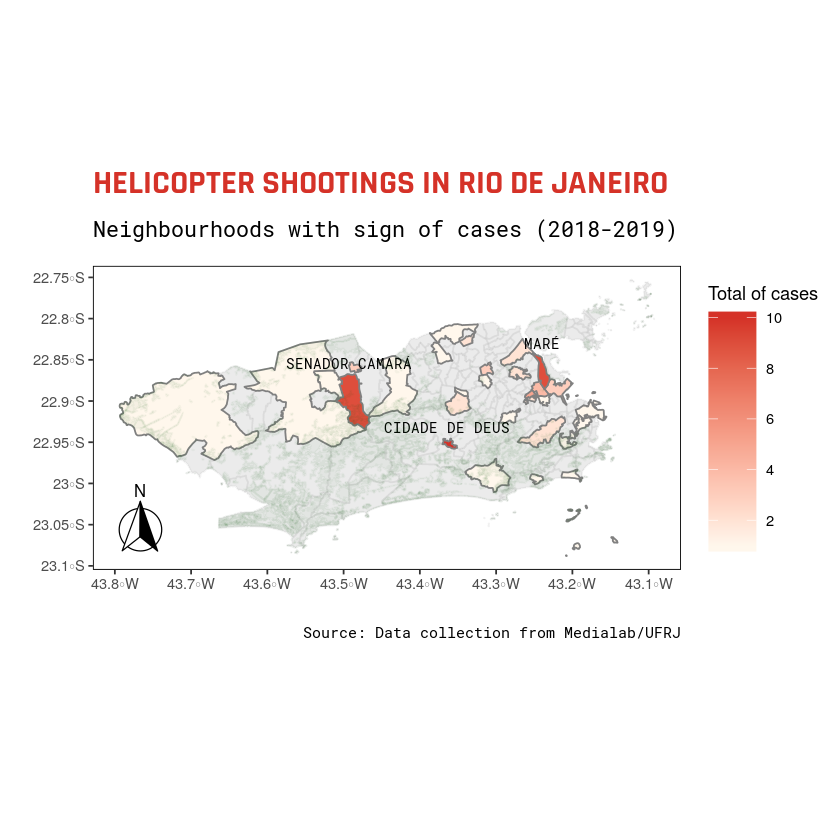

In [49]:
# Plota gráfico                         
ggplot() + 
  geom_sf(data = rio, color=alpha("gray",0.2), fill=alpha("gray",0.3)) + 
  geom_sf(data = casos_bairro, color = gray(.5), aes(fill = casos_bairro$EVIDENCI_1)) +
  scale_fill_continuous(low = alpha("#fff7ec",1), high = alpha("#d53228",1), breaks = c(0, 2,4,6,8,10),
                        labels = escala,
                      guide=guide_colorbar(barwidth = 2,barheight = 10, title = "Total of cases")) +
  geom_sf_text(data = s_bairros, family = "Roboto Mono", colour = "black",vjust = s_bairros$vjust,
               size = 3, check_overlap = TRUE, 
               mapping = aes(label = s_bairros$BAIRRO)) +
 geom_sf(data = vegetal, color=alpha("darkgreen",0.04), fill=alpha("darkgreen",0.04)) +
  annotation_north_arrow(location = "bl", which_north = "true", 
                         style = north_arrow_fancy_orienteering) +
  ggtitle("HELICOPTER SHOOTINGS IN RIO DE JANEIRO",
          subtitle = "Neighbourhoods with sign of cases (2018-2019)") +
  theme(plot.title=element_text(family="Rajdhani Bold", size=20, colour = "#d53228", vjust = 5),
        plot.subtitle = element_text(family="Roboto Mono", size=13, colour = "black", vjust = 4),
        plot.caption = element_text(family="Roboto Mono", size=9, colour = "black"),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.border = element_rect(colour = "black", fill=NA, size=0.5),
        panel.background = element_blank()) +
  xlab("") + ylab("") +
  labs(caption = "Source: Data collection from Medialab/UFRJ") +
#  theme_bw() +
  coord_sf()

ggsave("mapa_porlocal.jpg")